In [52]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'position $x$')

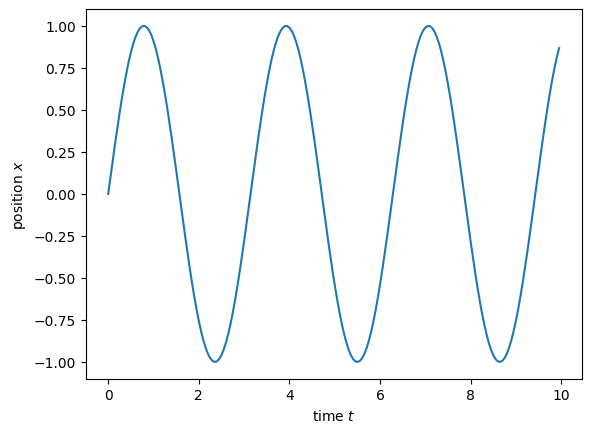

In [53]:
dt = 0.05
max_time = 10

omega = 2

t = np.arange(0, max_time, dt)
x = np.sin(omega*t)

plt.plot(t, x)
plt.xlabel('time $t$')
plt.ylabel('position $x$')

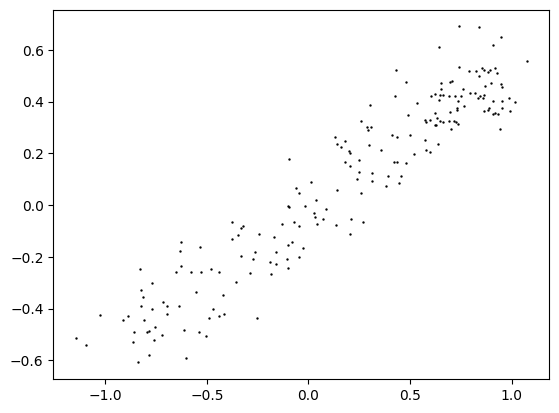

In [54]:
def noisy_project(t, sigma_m, sigma_s, theta, shift_x=0, shift_y=0):
    side_noise = np.random.normal(0, sigma_s, size=len(t)) # add gaussian noise
    move_noise = np.random.normal(0, sigma_m, size=len(t)) # add gaussian noise

    x = np.sin(t) + move_noise
    y = np.zeros_like(x) + side_noise
    ## perform projection

    rot_x = x*np.cos(theta) - y*np.sin(theta)
    rot_y = x*np.sin(theta) + y*np.cos(theta)
    return (rot_x - shift_x, rot_y - shift_y)

x_coords, y_coords = noisy_project(t, 0.1, 0.1, 0.5, 0, 0)
plt.scatter(x_coords, y_coords, s=0.5, color='black')

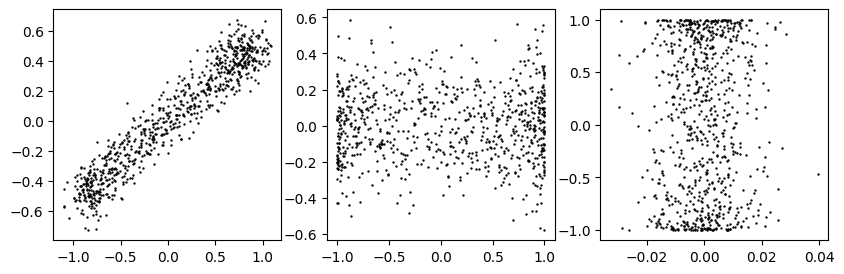

In [55]:
dt = 0.05
max_time = 40

omega = 2

t = np.arange(0, max_time, dt)


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
x1, y1 = noisy_project(t, 0.1, 0.1, 0.5, 0, 0)
axs[0].scatter(x1, y1, s=0.5, color='black')

x2, y2 = noisy_project(t, 0, 0.2, 0, 0, 0)
axs[1].scatter(x2, y2, s=0.5, color='black')


x3, y3 = noisy_project(t, 0, 0.01, np.pi/2, 0, 0)
axs[2].scatter(x3, y3, s=0.5, color='black')

In [56]:
# our 6-dimensional observation data
X = np.array([x1, y1, x2, y2, x3, y3])
print(X)

# Task: produce the PCs for these datasets, and show that the first PC 
# demonstrates the SHO behavior of the system, and that the succeeding
# PCs captures the noise. How do you reproduce the dataset from the PCs?

[[-5.47629928e-02 -1.27140914e-01  1.15632581e-01 ...  7.34682892e-01
   5.41659844e-01  6.94723523e-01]
 [ 1.91506564e-01 -8.62594235e-02 -9.78414793e-02 ...  3.74763364e-01
   3.14910800e-01  3.89828111e-01]
 [ 0.00000000e+00  4.99791693e-02  9.98334166e-02 ...  8.36412321e-01
   8.07973404e-01  7.77514973e-01]
 [-2.81964947e-02  1.74656982e-01  1.35222093e-01 ...  4.26026320e-01
   1.81270193e-01  7.63020005e-02]
 [ 1.35483407e-03  3.21843371e-03 -1.15891638e-02 ... -3.28861241e-03
  -8.54730054e-03 -1.17108905e-02]
 [-8.29596605e-20  4.99791693e-02  9.98334166e-02 ...  8.36412321e-01
   8.07973404e-01  7.77514973e-01]]


In [57]:
X_cov = np.cov(X)

eigenvalues, eigenvectors = np.linalg.eigh(X_cov)

transform = eigenvectors.T @ X

eigenvalues = eigenvalues[::-1]
transform = transform[::-1]

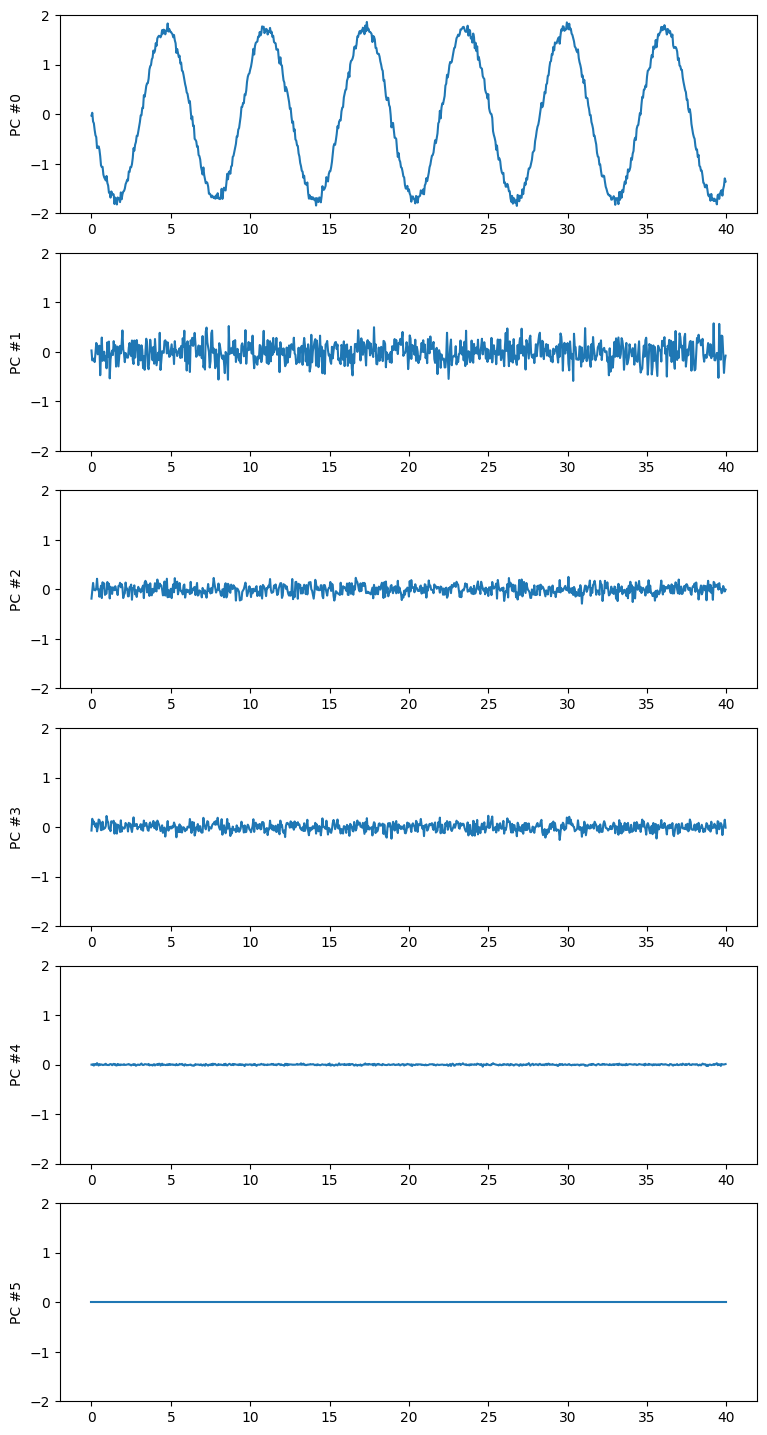

In [59]:
fig, axs = plt.subplots(6, 1, figsize=(9, 18))

for idx, ax in enumerate(axs):
    ax.plot(t, transform[idx])
    ax.set_ylabel(f'PC #{idx}')
    ax.set_ylim(-2,2)